In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from datafold import (
    EDMD,
    DMDStandard,
    GaussianKernel,
    TSCPolynomialFeatures,
    TSCRadialBasis,
    TSCDataFrame,
    TSCTakensEmbedding
)
from datafold.utils._systems import Hopf
from datafold.utils.general import generate_2d_regular_mesh

import errors
import models
import utils
import random
from sklearn.metrics import mean_squared_error

In [2]:
dfs = []

for i in range(1,11):
    file_path =  f"input_data/bottleneck_1door/density_mesh_{i}.txt"
    df = pd.read_csv(file_path, sep=" ")
    value1 = i-1
    df.insert(0, 'id', value1)
    df.set_index(['id','timeStep'], inplace = True)
    
    data = df
    new_column_names = []
    for j in range(0,len(data.columns)):
        if j == 0:
            new_column_names.append(data.columns[j])
        else:
            new_column_names.append('measurement_area' + str(j))
    data.columns = new_column_names
    data.fillna(0, inplace=True)

    sums_data= data.groupby(['id','timeStep']).sum()
    sums_data.drop(columns=['faceId'], inplace=True)
    #sums_data
    #sums_data.drop(columns=['run_id'], inplace =True)
    #sums_data.insert(0, 'id', i-1)

    dfs.append(sums_data)

result_df = pd.concat(dfs, ignore_index=False)

result_df





measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     209.0              203.0                0.0   
   2                     209.0              203.0                0.0   
   3                     199.0              203.0                0.0   
   4                     190.0              206.0                0.0   
   5                     177.0              207.0                0.0   
...                        ...                ...                ...   
9  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  measurement_area5  
id timeStep                                        
0  1                       0.0               1000  
   2                       0.0               1000  
   3                       0.0               1000  
   4                       0.0               1000  
   5                       0.0               1000  
...                        ...                ...  
9  1247                    0.0                  0  
   1248                    0.0                  0  
   1249                    0.0                  0  
   1250                    0.0                  0  
   1251                    0.0                  0  

[12510 rows x 5 columns]

In [4]:

#result_df.set_index(['id', 'timeStep'], append=True, inplace=True)
data_final = result_df
data_reset_index = data_final.reset_index()
last_column_df = data_reset_index.loc[:, ['id', 'timeStep', data_reset_index.columns[-1]]]
last_column_df = last_column_df.rename(columns={'id': 'id', 'timeStep': 'timeStep'})
last_column_df.set_index(['id', 'timeStep'], inplace=True)
data_final = data_reset_index.iloc[:, :-1]
data_final = data_final.rename(columns={'id': 'id', 'timeStep': 'timeStep'})
data_final.set_index(['id', 'timeStep'], inplace=True)

data_final

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     209.0              203.0                0.0   
   2                     209.0              203.0                0.0   
   3                     199.0              203.0                0.0   
   4                     190.0              206.0                0.0   
   5                     177.0              207.0                0.0   
...                        ...                ...                ...   
9  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
9  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[12510 rows x 4 columns]

In [5]:
seed_value = 42
random.seed(seed_value)
random_train = random.sample(range(10), 6)
remaining_numbers = list(set(range(10)) - set(random_train))
random_valid = random.sample(remaining_numbers, 2)
remaining_numbers = list(set(remaining_numbers) - set(random_valid))

# Select 2 more unique random numbers from the updated remaining pool
random_test = random.sample(remaining_numbers, 2)
print(random_train)
print(random_valid)
print(random_test)

[1, 0, 4, 9, 6, 5]
[8, 3]
[2, 7]


In [6]:
random_final_input = random_train + random_valid
random_final_input

[1, 0, 4, 9, 6, 5, 8, 3]

In [7]:
data_train = []
count=0
for i in random_train:
   temp_df = data_final.loc[(i, slice(None)), :]
   #temp_df.insert(0, 'id', count)
   #temp_df.set_index('id', append=True, inplace = True)
   
   temp_df = temp_df.rename(index={i:count}, level='id')
   count=count+1
   data_train.append(temp_df)

final_data_train = pd.concat(data_train, ignore_index=False)

final_data_train

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     192.0              204.0                0.0   
   2                     192.0              204.0                0.0   
   3                     179.0              208.0                0.0   
   4                     173.0              207.0                0.0   
   5                     162.0              206.0                0.0   
...                        ...                ...                ...   
5  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
5  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[7506 rows x 4 columns]

In [8]:
data_valid = []
count=0
for i in random_valid:
   temp_df = data_final.loc[(i, slice(None)), :]
   #temp_df.insert(0, 'id', count)
   #temp_df.set_index('id', append=True, inplace = True)
   
   temp_df = temp_df.rename(index={i:count}, level='id')
   count=count+1
   data_valid.append(temp_df)

final_data_valid = pd.concat(data_valid, ignore_index=False)

final_data_valid

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     170.0              187.0                0.0   
   2                     172.0              200.0                0.0   
   3                     179.0              200.0                0.0   
   4                     180.0              215.0                0.0   
   5                     175.0              215.0                0.0   
...                        ...                ...                ...   
1  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
1  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[2502 rows x 4 columns]

In [9]:
data_final_input = []
count=0
for i in random_final_input:
   temp_df = data_final.loc[(i, slice(None)), :]
   #temp_df.insert(0, 'id', count)
   #temp_df.set_index('id', append=True, inplace = True)
   
   temp_df = temp_df.rename(index={i:count}, level='id')
   count=count+1
   data_final_input.append(temp_df)

final_data_input = pd.concat(data_final_input, ignore_index=False)

final_data_input

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     192.0              204.0                0.0   
   2                     192.0              204.0                0.0   
   3                     179.0              208.0                0.0   
   4                     173.0              207.0                0.0   
   5                     162.0              206.0                0.0   
...                        ...                ...                ...   
7  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
7  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[10008 rows x 4 columns]

In [10]:
data_test = []
count=0
for i in random_test:
   temp_df = data_final.loc[(i, slice(None)), :]
   #temp_df.insert(0, 'id', count)
   #temp_df.set_index('id', append=True, inplace = True)
   
   temp_df = temp_df.rename(index={i:count}, level='id')
   count=count+1
   data_test.append(temp_df)

final_data_test = pd.concat(data_test, ignore_index=False)

final_data_test

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     201.0              205.0                0.0   
   2                     201.0              205.0                0.0   
   3                     192.0              217.0                0.0   
   4                     177.0              215.0                0.0   
   5                     168.0              219.0                0.0   
...                        ...                ...                ...   
1  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
1  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[2502 rows x 4 columns]

In [11]:
x_tsc_train = TSCDataFrame.from_frame_list([final_data_train]).astype(np.float64)
x_tsc_valid = TSCDataFrame.from_frame_list([final_data_valid]).astype(np.float64)
x_tsc_input = TSCDataFrame.from_frame_list([final_data_input]).astype(np.float64)
x_tsc_test = TSCDataFrame.from_frame_list([final_data_test]).astype(np.float64)

In [12]:
x_tsc_train

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  1                 192.0              204.0                0.0   
   2                 192.0              204.0                0.0   
   3                 179.0              208.0                0.0   
   4                 173.0              207.0                0.0   
   5                 162.0              206.0                0.0   
...                    ...                ...                ...   
5  1247                0.0                0.0                0.0   
   1248                0.0                0.0                0.0   
   1249                0.0                0.0                0.0   
   1250                0.0                0.0                0.0   
   1251                0.0                0.0                0.0   

feature  measurement_area4  
ID time                     
0  1                   0.0  
   2                   0.0  
   3                   0.0  
   4                   0.0  
   5                   0.0  
...                    ...  
5  1247                0.0  
   1248                0.0  
   1249                0.0  
   1250                0.0  
   1251                0.0  

[7506 rows x 4 columns]

In [13]:
x_tsc_valid

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  1                 170.0              187.0                0.0   
   2                 172.0              200.0                0.0   
   3                 179.0              200.0                0.0   
   4                 180.0              215.0                0.0   
   5                 175.0              215.0                0.0   
...                    ...                ...                ...   
1  1247                0.0                0.0                0.0   
   1248                0.0                0.0                0.0   
   1249                0.0                0.0                0.0   
   1250                0.0                0.0                0.0   
   1251                0.0                0.0                0.0   

feature  measurement_area4  
ID time                     
0  1                   0.0  
   2                   0.0  
   3                   0.0  
   4                   0.0  
   5                   0.0  
...                    ...  
1  1247                0.0  
   1248                0.0  
   1249                0.0  
   1250                0.0  
   1251                0.0  

[2502 rows x 4 columns]

In [14]:
x_tsc_input

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  1                 192.0              204.0                0.0   
   2                 192.0              204.0                0.0   
   3                 179.0              208.0                0.0   
   4                 173.0              207.0                0.0   
   5                 162.0              206.0                0.0   
...                    ...                ...                ...   
7  1247                0.0                0.0                0.0   
   1248                0.0                0.0                0.0   
   1249                0.0                0.0                0.0   
   1250                0.0                0.0                0.0   
   1251                0.0                0.0                0.0   

feature  measurement_area4  
ID time                     
0  1                   0.0  
   2                   0.0  
   3                   0.0  
   4                   0.0  
   5                   0.0  
...                    ...  
7  1247                0.0  
   1248                0.0  
   1249                0.0  
   1250                0.0  
   1251                0.0  

[10008 rows x 4 columns]

In [15]:
x_tsc_test

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  1                 201.0              205.0                0.0   
   2                 201.0              205.0                0.0   
   3                 192.0              217.0                0.0   
   4                 177.0              215.0                0.0   
   5                 168.0              219.0                0.0   
...                    ...                ...                ...   
1  1247                0.0                0.0                0.0   
   1248                0.0                0.0                0.0   
   1249                0.0                0.0                0.0   
   1250                0.0                0.0                0.0   
   1251                0.0                0.0                0.0   

feature  measurement_area4  
ID time                     
0  1                   0.0  
   2                   0.0  
   3                   0.0  
   4                   0.0  
   5                   0.0  
...                    ...  
1  1247                0.0  
   1248                0.0  
   1249                0.0  
   1250                0.0  
   1251                0.0  

[2502 rows x 4 columns]

In [154]:
dmd = models.dmd(x_tsc_train)
dmd_values_train = dmd.predict(x_tsc_train.initial_states(), time_values=x_tsc_train.time_values())
x_predicted_dmd_train = dmd_values_train
train_dmd_mae, train_dmd_mse, train_dmd_rmse,_,_ = errors.compiled_errors(x_tsc_train, x_predicted_dmd_train)
mse_train_sklearn = mean_squared_error(x_tsc_train, x_predicted_dmd_train)

dmd_values_valid = dmd.predict(x_tsc_valid.initial_states(), time_values=x_tsc_valid.time_values())
x_predicted_dmd_valid = dmd_values_valid
valid_dmd_mae, valid_dmd_mse, valid_dmd_rmse,_,_ = errors.compiled_errors(x_tsc_valid, x_predicted_dmd_valid)
mse_valid_sklearn = mean_squared_error(x_tsc_valid, x_predicted_dmd_valid)

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [155]:
print('Training error for basic DMD')
print(f"train_mae: {train_dmd_mae}")
print(f"train_mse: {train_dmd_mse}")
print(f"train_rmse: {train_dmd_rmse}")
print("\n")
print('Validation error for basic DMD')
print(f"validation mae: {valid_dmd_mae}")
print(f"validation mse: {valid_dmd_mse}")
print(f"validation rmse: {valid_dmd_rmse}")

mse_valid_sklearn

Training error for basic DMD
train_mae: 20.65299218105185
train_mse: 1505.2743150279596
train_rmse: 38.797864825631315


Validation error for basic DMD
validation mae: 21.022111473539642
validation mse: 1477.584960883181
validation rmse: 38.43936733198377


1477.5849608831804

In [ ]:
dmd_values_test = dmd.predict(x_tsc_input.initial_states(), time_values=x_tsc_input.time_values())
x_predicted_dmd_test = dmd_values_test
test_dmd_mae, test_dmd_mse, test_dmd_rmse,_,_ = errors.compiled_errors(x_tsc_test, x_predicted_dmd_test)

In [19]:
print('Testing error')
print(f"Testing mae:{test_dmd_mae}")
print(f"Testing mse:{test_dmd_mse}")
print(f"Testing rmse:{test_dmd_rmse}")

Testing error
Testing mae:20.81309980760057
Testing mse:1525.988726122956
Testing rmse:39.063905669082246


In [ ]:
num_columns = x_tsc_train.shape[1]
train_error = {}
valid_error = {}

for rank in range(1, num_columns +1):
    if rank == num_columns:
        dmd = models.dmd(x_tsc_train)
    else:
        dmd = models.dmd(x_tsc_train, rank = rank)
    
    dmd_values_train = dmd.predict(x_tsc_train.initial_states(), time_values=x_tsc_train.time_values())
    x_predicted_dmd_train = dmd_values_train
    train_dmd_mae, train_dmd_mse, train_dmd_rmse,_,_  = errors.compiled_errors(x_tsc_train, x_predicted_dmd_train)

    train_error[rank] = {'mae': train_dmd_mae, 'mse' : train_dmd_mse, 'rmse': train_dmd_rmse}

    dmd_values_valid = dmd.predict(x_tsc_valid.initial_states(), time_values=x_tsc_valid.time_values())
    x_predicted_dmd_valid = dmd_values_valid
    valid_dmd_mae, valid_dmd_mse, valid_dmd_rmse,_,_  = errors.compiled_errors(x_tsc_valid, x_predicted_dmd_valid)
    
    valid_error[rank] = {'mae': valid_dmd_mae, 'mse' : valid_dmd_mse, 'rmse': valid_dmd_rmse}


In [ ]:
#train_mae_error = []
#train_mse_error = []
#train_rmse_error = []


    #train_mae_error.append(train_dmd_mae)
    #train_mse_error.append(train_dmd_mse)
    #train_rmse_error.append(train_dmd_rmse)

    #train_error.update({'rank' : i, 'mae': train_dmd_mae, 'mse' : train_dmd_mse, 'rmse': train_dmd_rmse})

In [21]:
print(f"Training error only for DMD: {train_error}")
print(f"Validation error only for DMD: {valid_error}")

Training error only for DMD: {1: {'mae': 37.99077330293692, 'mse': 11514.37419937843, 'rmse': 107.30505206829001}, 2: {'mae': 36.68899396606484, 'mse': 3129.5089111567195, 'rmse': 55.94201382821966}, 3: {'mae': 22.766867207579402, 'mse': 1655.870642508807, 'rmse': 40.69239047424969}, 4: {'mae': 20.65299218105185, 'mse': 1505.2743150279596, 'rmse': 38.797864825631315}}
Validation error only for DMD: {1: {'mae': 38.49927364300081, 'mse': 11700.650685270006, 'rmse': 108.1695460158265}, 2: {'mae': 36.20397837989798, 'mse': 3126.448390261484, 'rmse': 55.91465273308495}, 3: {'mae': 23.068217829304622, 'mse': 1637.164779682002, 'rmse': 40.461892932511226}, 4: {'mae': 21.022111473539642, 'mse': 1477.584960883181, 'rmse': 38.43936733198377}}


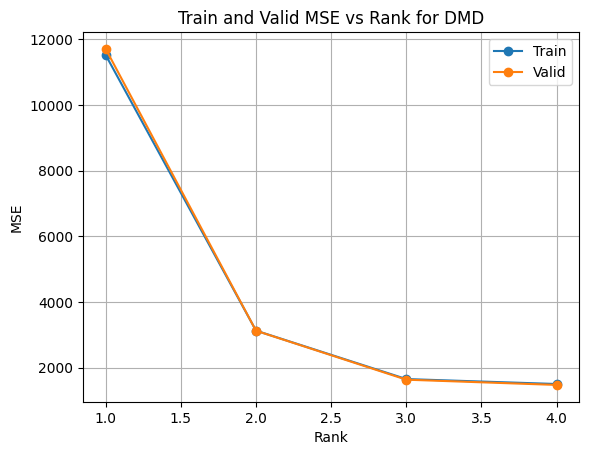

In [22]:
ranks = list(train_error.keys())
train_mse_values = [train_error[rank]['mse'] for rank in ranks]
valid_mse_values = [valid_error[rank]['mse'] for rank in ranks]

# Create the plot
plt.plot(ranks, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(ranks, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for DMD')
plt.legend()
plt.grid(True)
plt.show()

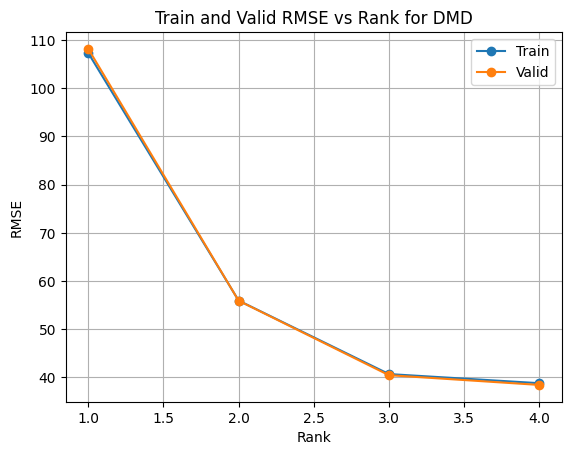

In [23]:
ranks = list(train_error.keys())
train_rmse_values = [train_error[rank]['rmse'] for rank in ranks]
valid_rmse_values = [valid_error[rank]['rmse'] for rank in ranks]

# Create the plot
plt.plot(ranks, train_rmse_values, marker='o', linestyle='-', label='Train')
plt.plot(ranks, valid_rmse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Rank')
plt.ylabel('RMSE')
plt.title('Train and Valid RMSE vs Rank for DMD')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
num_columns = x_tsc_input.shape[1]

min_mse_key = min(valid_error, key=lambda k: valid_error[k]['mse'])
min_mse_value = valid_error[min_mse_key]['mse']

if min_mse_key == num_columns:
    dmd = models.dmd(x_tsc_input)
else:
    dmd = models.dmd(x_tsc_input, rank = min_mse_key)

dmd_values_test = dmd.predict(x_tsc_test.initial_states(), time_values=x_tsc_test.time_values())
x_predicted_dmd_test = dmd_values_test
test_dmd_mae, test_dmd_mse, test_dmd_rmse,_,_  = errors.compiled_errors(x_tsc_test, x_predicted_dmd_test)


In [25]:
print(f"DMD Rank for minimum MSE : {min_mse_key}")
print(f"Minimum MSE value : {min_mse_value}")
print(f"\n")
print('Testing error')
print(f"Testing mae:{test_dmd_mae}")
print(f"Testing mse:{test_dmd_mse}")
print(f"Testing rmse:{test_dmd_rmse}")

DMD Rank for minimum MSE : 4
Minimum MSE value : 1477.584960883181


Testing error
Testing mae:22.097010709395324
Testing mse:1790.7965731301708
Testing rmse:42.31780444600323


In [ ]:
num_columns = x_tsc_input.shape[1]

min_rmse_key = min(valid_error, key=lambda k: valid_error[k]['rmse'])
min_rmse_value = valid_error[min_rmse_key]['rmse']

if min_rmse_key == num_columns:
    dmd = models.dmd(x_tsc_input)
else:
    dmd = models.dmd(x_tsc_input, rank = min_rmse_key)

dmd_values_test = dmd.predict(x_tsc_test.initial_states(), time_values=x_tsc_test.time_values())
x_predicted_dmd_test = dmd_values_test
test_dmd_mae, test_dmd_mse, test_dmd_rmse,_,_  = errors.compiled_errors(x_tsc_test, x_predicted_dmd_test)

In [27]:
print(f"DMD Rank for minimum RMSE : {min_rmse_key}")
print(f"Minimum RMSE value : {min_rmse_value}")
print(f"\n")
print('Testing error')
print(f"Testing mae:{test_dmd_mae}")
print(f"Testing mse:{test_dmd_mse}")
print(f"Testing rmse:{test_dmd_rmse}")

DMD Rank for minimum RMSE : 4
Minimum RMSE value : 38.43936733198377


Testing error
Testing mae:22.097010709395324
Testing mse:1790.7965731301708
Testing rmse:42.31780444600323


In [28]:
time_delay_embed = TSCTakensEmbedding(delays=10, lag=0, frequency=1, kappa=0).fit(x_tsc_train)
embed_values_train = time_delay_embed.transform(x_tsc_train)
embed_values_valid = time_delay_embed.transform(x_tsc_valid)
embed_values_input = time_delay_embed.transform(x_tsc_input)
embed_values_test = time_delay_embed.transform(x_tsc_test)

#embed_values_new_train = time_delay_embed.inverse_transform(embed_values_train)
#embed_values_train

In [ ]:
dmd = models.dmd(embed_values_train)
dmd_values_tde_train = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())

x_alternate_train = time_delay_embed.inverse_transform(dmd_values_tde_train)

    #dmd_mae_new, dmd_mse_new, dmd_rmse_new, dmd_mape_new, dmd_r_squared_new = errors.compiled_errors(embed_values, x_predicted_dmd_new)
x_time_delay_train_init = x_tsc_train.iloc[10:]
train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_init, x_alternate_train)

dmd_values_tde_valid = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())

x_alternate_valid = time_delay_embed.inverse_transform(dmd_values_tde_valid)

    #dmd_mae_new, dmd_mse_new, dmd_rmse_new, dmd_mape_new, dmd_r_squared_new = errors.compiled_errors(embed_values, x_predicted_dmd_new)
x_time_delay_valid_init = x_tsc_valid.iloc[10:]
valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_init, x_alternate_valid)

In [30]:
print('Training error for basic time delay embedding and DMD')
print(f"train_mae: {train_tde_dmd_mae}")
print(f"train_mse: {train_tde_dmd_mse}")
print(f"train_rmse: {train_tde_dmd_rmse}")
print("\n")
print('Validation error for basic time delay embedding and DMD')
print(f"validation mae: {valid_tde_dmd_mae}")
print(f"validation mse: {valid_tde_dmd_mse}")
print(f"validation rmse: {valid_tde_dmd_rmse}")

Training error for basic time delay embedding and DMD
train_mae: 10.793505889673883
train_mse: 573.7492678877876
train_rmse: 23.953063851787054


Validation error for basic time delay embedding and DMD
validation mae: 11.076526542698145
validation mse: 572.2276421688466
validation rmse: 23.921280111416415


In [214]:
time_delay_embed = TSCTakensEmbedding(delays=10, lag=2, frequency=4, kappa=0).fit(x_tsc_train)
embed_values_train2 = time_delay_embed.transform(x_tsc_train)
embed_values_valid2 = time_delay_embed.transform(x_tsc_valid)
embed_values_input2 = time_delay_embed.transform(x_tsc_input)
embed_values_test2 = time_delay_embed.transform(x_tsc_test)

#embed_values_new_train = time_delay_embed.inverse_transform(embed_values_train)
#embed_values_train

In [215]:
dmd = models.dmd(embed_values_train2)
dmd_values_tde_train = dmd.predict(embed_values_train2.initial_states(), time_values=embed_values_train2.time_values())

x_alternate_train = time_delay_embed.inverse_transform(dmd_values_tde_train)

    #dmd_mae_new, dmd_mse_new, dmd_rmse_new, dmd_mape_new, dmd_r_squared_new = errors.compiled_errors(embed_values, x_predicted_dmd_new)
x_time_delay_train_init = x_tsc_train.iloc[10:]
train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_init, x_alternate_train)

dmd_values_tde_valid = dmd.predict(embed_values_valid2.initial_states(), time_values=embed_values_valid2.time_values())

x_alternate_valid = time_delay_embed.inverse_transform(dmd_values_tde_valid)

    #dmd_mae_new, dmd_mse_new, dmd_rmse_new, dmd_mape_new, dmd_r_squared_new = errors.compiled_errors(embed_values, x_predicted_dmd_new)
x_time_delay_valid_init = x_tsc_valid.iloc[10:]
valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_init, x_alternate_valid)

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(44, 44)) has not full rank (linregress_model.rank_=42), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [216]:
print('Training error for basic time delay embedding and DMD')
print(f"train_mae: {train_tde_dmd_mae}")
print(f"train_mse: {train_tde_dmd_mse}")
print(f"train_rmse: {train_tde_dmd_rmse}")
print("\n")
print('Validation error for basic time delay embedding and DMD')
print(f"validation mae: {valid_tde_dmd_mae}")
print(f"validation mse: {valid_tde_dmd_mse}")
print(f"validation rmse: {valid_tde_dmd_rmse}")

Training error for basic time delay embedding and DMD
train_mae: 3.9759709911217502
train_mse: 79.53196582598623
train_rmse: 8.918069624419077


Validation error for basic time delay embedding and DMD
validation mae: 3.9348252079423034
validation mse: 77.2750864219013
validation rmse: 8.790624916460793


In [ ]:
num_columns = embed_values_train.shape[1]
x_time_delay_train_init = x_tsc_train.iloc[10:]
train_error_tde = {}
valid_error_tde = {}

for rank in range(1, num_columns +1):
    if rank == num_columns:
        dmd = models.dmd(embed_values_train)
    else:
        dmd = models.dmd(embed_values_train, rank = rank)
    
    dmd_values_new_train = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_alternate_train = time_delay_embed.inverse_transform(dmd_values_new_train)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_init, x_alternate_train)
    train_error_tde[rank] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}

    dmd_values_new_valid = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_alternate_valid = time_delay_embed.inverse_transform(dmd_values_new_valid)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_init, x_alternate_valid)
    valid_error_tde[rank] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}



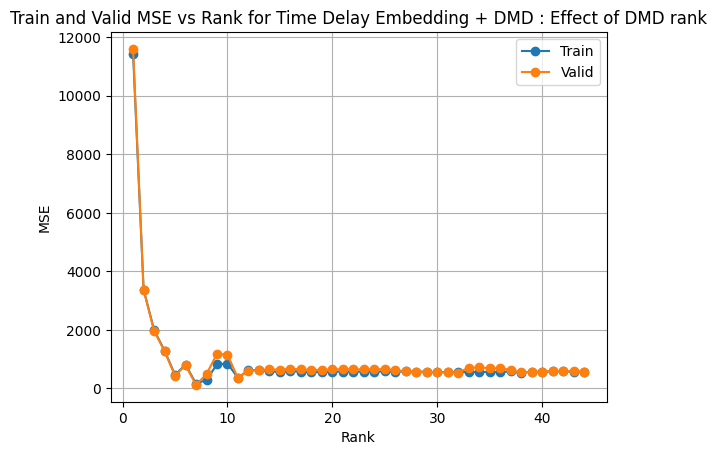

In [32]:
ranks = list(train_error_tde.keys())
train_tde_mse_values = [train_error_tde[rank]['mse'] for rank in ranks]
valid_tde_mse_values = [valid_error_tde[rank]['mse'] for rank in ranks]

# Create the plot
plt.plot(ranks, train_tde_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(ranks, valid_tde_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding + DMD : Effect of DMD rank')
plt.legend()
plt.grid(True)
plt.show()

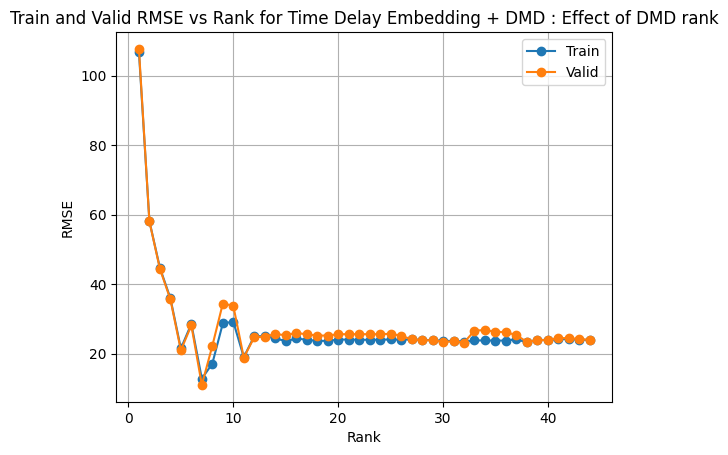

In [33]:
ranks = list(train_error_tde.keys())
train_tde_mse_values = [train_error_tde[rank]['rmse'] for rank in ranks]
valid_tde_mse_values = [valid_error_tde[rank]['rmse'] for rank in ranks]

# Create the plot
plt.plot(ranks, train_tde_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(ranks, valid_tde_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Rank')
plt.ylabel('RMSE')
plt.title('Train and Valid RMSE vs Rank for Time Delay Embedding + DMD : Effect of DMD rank')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
num_columns = x_tsc_input.shape[1]

min_mse_tde_key = min(valid_error_tde, key=lambda k: valid_error_tde[k]['mse'])
min_mse_tde_value = valid_error_tde[min_mse_tde_key]['mse']

x_time_delay_test_init = x_tsc_test.iloc[10:]

if min_mse_tde_key == num_columns:
    dmd = models.dmd(embed_values_input)
else:
    dmd = models.dmd(embed_values_input, rank = min_mse_tde_key)
    
dmd_values_new_test = dmd.predict(embed_values_test.initial_states(), time_values=embed_values_test.time_values())
x_alternate_test = time_delay_embed.inverse_transform(dmd_values_new_test)
test_tde_dmd_mae, test_tde_dmd_mse, test_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_test_init, x_alternate_test)


In [37]:
print(f"DMD Rank for minimum MSE : {min_mse_tde_key}")
print(f"Minimum MSE value : {min_mse_tde_value}")
print(f"\n")
print('Testing error')
print(f"Testing mae:{test_tde_dmd_mae}")
print(f"Testing mse:{test_tde_dmd_mse}")
print(f"Testing rmse:{test_tde_dmd_rmse}")

DMD Rank for minimum MSE : 7
Minimum MSE value : 120.79943971439835


Testing error
Testing mae:6.034856900067533
Testing mse:140.769669005
Testing rmse:11.86463943847431


In [218]:
train_error_tde2 = {}
valid_error_tde2 = {}

for delay in range(2,30):
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=2, frequency=4, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[delay] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[delay] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

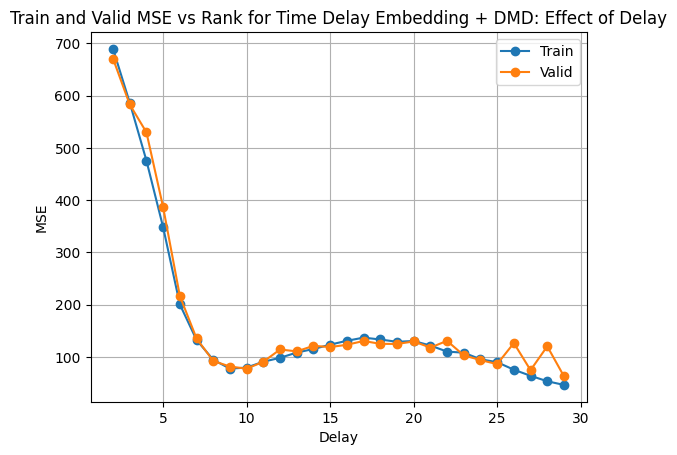

In [219]:
delays = list(train_error_tde2.keys())
train_tde_mse_values = [train_error_tde2[delay]['mse'] for delay in delays]
valid_tde_mse_values = [valid_error_tde2[delay]['mse'] for delay in delays]

# Create the plot
plt.plot(delays, train_tde_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_tde_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding + DMD: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

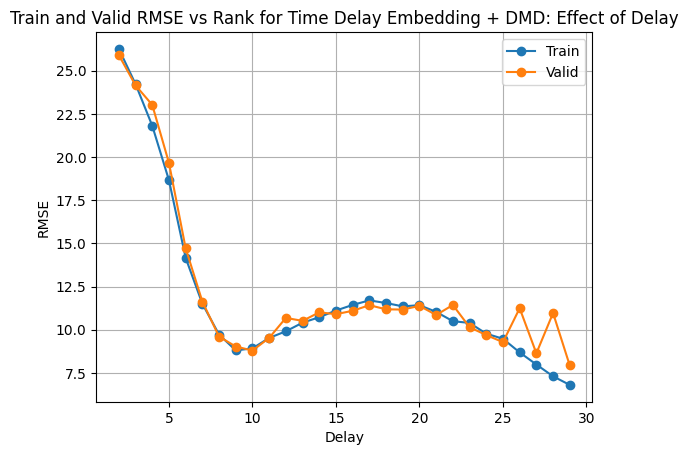

In [220]:
delays = list(train_error_tde2.keys())
train_tde_rmse_values = [train_error_tde2[delay]['rmse'] for delay in delays]
valid_tde_rmse_values = [valid_error_tde2[delay]['rmse'] for delay in delays]

# Create the plot
plt.plot(delays, train_tde_rmse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_tde_rmse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('RMSE')
plt.title('Train and Valid RMSE vs Rank for Time Delay Embedding + DMD: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
num_columns = x_tsc_input.shape[1]

min_mse_delay_tde_key = min(valid_error_tde2, key=lambda k: valid_error_tde2[k]['mse'])
min_mse_delay_tde_value = valid_error_tde2[min_mse_delay_tde_key]['mse']

time_delay_embed = TSCTakensEmbedding(delays=min_mse_delay_tde_key, lag=0, frequency=1, kappa=0).fit(x_tsc_input)
embed_values_input_delay = time_delay_embed.transform(x_tsc_input)
embed_values_test_delay = time_delay_embed.transform(x_tsc_test)

x_time_delay_test_init = x_tsc_test.iloc[min_mse_delay_tde_key:]

dmd = models.dmd(embed_values_input_delay)
    
dmd_values_new_test_delay = dmd.predict(embed_values_test_delay.initial_states(), time_values=embed_values_test_delay.time_values())
x_alternate_test_delay = time_delay_embed.inverse_transform(dmd_values_new_test_delay)
test_tde_dmd_mae, test_tde_dmd_mse, test_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_test_init, x_alternate_test_delay)


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


In [58]:
print(f"Time Delay for minimum MSE : {min_mse_delay_tde_key}")
print(f"Minimum MSE value : {min_mse_delay_tde_value}")

print(f"\n")
print('Testing error')
print(f"Testing mae:{test_tde_dmd_mae}")
print(f"Testing mse:{test_tde_dmd_mse}")
print(f"Testing rmse:{test_tde_dmd_rmse}")

Time Delay for minimum MSE : 29
Minimum MSE value : 73.1885194234736


Testing error
Testing mae:3.893584719821733
Testing mse:83.4310616051117
Testing rmse:9.134060521209157


In [59]:
num_columns = x_tsc_input.shape[1]

min_rmse_delay_tde_key = min(valid_error_tde2, key=lambda k: valid_error_tde2[k]['rmse'])
min_rmse_delay_tde_value = valid_error_tde2[min_rmse_delay_tde_key]['rmse']

time_delay_embed = TSCTakensEmbedding(delays=min_rmse_delay_tde_key, lag=0, frequency=1, kappa=0).fit(x_tsc_input)
embed_values_input_delay = time_delay_embed.transform(x_tsc_input)
embed_values_test_delay = time_delay_embed.transform(x_tsc_test)

x_time_delay_test_init = x_tsc_test.iloc[min_rmse_delay_tde_key:]

dmd = models.dmd(embed_values_input_delay)
    
dmd_values_new_test_delay = dmd.predict(embed_values_test_delay.initial_states(), time_values=embed_values_test_delay.time_values())
x_alternate_test_delay = time_delay_embed.inverse_transform(dmd_values_new_test_delay)
test_tde_dmd_mae, test_tde_dmd_mse, test_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_test_init, x_alternate_test_delay)


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


In [60]:
print(f"Time Delay for minimum RMSE : {min_rmse_delay_tde_key}")
print(f"Minimum RMSE value : {min_rmse_delay_tde_value}")

print(f"\n")
print('Testing error')
print(f"Testing mae:{test_tde_dmd_mae}")
print(f"Testing mse:{test_tde_dmd_mse}")
print(f"Testing rmse:{test_tde_dmd_rmse}")

Time Delay for minimum MSE : 29
Minimum RMSE value : 8.555028896705936


Testing error
Testing mae:3.893584719821733
Testing mse:83.4310616051117
Testing rmse:9.134060521209157


In [61]:
num_columns = x_tsc_input.shape[1]

min_mse_delay_tde_key = min(valid_error_tde2, key=lambda k: valid_error_tde2[k]['mse'])
min_mse_delay_tde_value = valid_error_tde2[min_mse_delay_tde_key]['mse']

time_delay_embed = TSCTakensEmbedding(delays=min_mse_delay_tde_key, lag=0, frequency=1, kappa=0).fit(x_tsc_input)
embed_values_input_delay = time_delay_embed.transform(x_tsc_input)
embed_values_test_delay = time_delay_embed.transform(x_tsc_test)

x_time_delay_test_init = x_tsc_test.iloc[min_mse_delay_tde_key:]

dmd = models.dmd(embed_values_input_delay, rank = min_mse_tde_key)
    
dmd_values_new_test_delay = dmd.predict(embed_values_test_delay.initial_states(), time_values=embed_values_test_delay.time_values())
x_alternate_test_delay = time_delay_embed.inverse_transform(dmd_values_new_test_delay)
test_tde_dmd_mae, test_tde_dmd_mse, test_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_test_init, x_alternate_test_delay)


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


In [62]:
print(f"Time Delay for minimum MSE : {min_mse_delay_tde_key}")
print(f"DMD Rank for minimum MSE : {min_mse_tde_key}")
print(f"Minimum MSE value : {min_mse_delay_tde_value}")
print(f"\n")
print('Testing error')
print(f"Testing mae:{test_tde_dmd_mae}")
print(f"Testing mse:{test_tde_dmd_mse}")
print(f"Testing rmse:{test_tde_dmd_rmse}")

Time Delay for minimum MSE : 29
DMD Rank for minimum MSE : 7
Minimum MSE value : 73.1885194234736


Testing error
Testing mae:13.366263991756673
Testing mse:876.4194204535833
Testing rmse:29.604381777932524


In [113]:
train_error_tde3 = {}
valid_error_tde3 = {}

for delay in range(1,30):
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=0, frequency=1, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    train_error_tde3[delay] = {}
    valid_error_tde3[delay] = {}

    for rank in range(1, num_columns +1):
        if rank == num_columns:
            dmd = models.dmd(embed_values_train)
        else:
            dmd = models.dmd(embed_values_train, rank = rank)

        dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
        x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

        x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
        train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
        train_error_tde3[delay][rank] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
        dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
        x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

        x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
        valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
        valid_error_tde3[delay][rank] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [114]:
train_error_tde3

{1: {1: {'mae': 37.94276067391291,
   'mse': 11507.042353061765,
   'rmse': 107.27088306274804},
  2: {'mae': 37.422806571936945,
   'mse': 3279.8263171828967,
   'rmse': 57.26976791626536},
  3: {'mae': 23.034020535880533,
   'mse': 1710.287581374479,
   'rmse': 41.355623334372304},
  4: {'mae': 20.84301286128915,
   'mse': 1532.782978471318,
   'rmse': 39.15077238665054},
  5: {'mae': 20.734881338235642,
   'mse': 1523.2791797748284,
   'rmse': 39.029209315265774},
  6: {'mae': 20.710762204971047,
   'mse': 1524.4656797628136,
   'rmse': 39.04440651057221},
  7: {'mae': 19.1720936023384,
   'mse': 1332.512907876538,
   'rmse': 36.503601300098296},
  8: {'mae': 18.99931395738005,
   'mse': 1322.1117724588287,
   'rmse': 36.36085494675323}},
 2: {1: {'mae': 37.89327032142756,
   'mse': 11499.326267483806,
   'rmse': 107.23491160757212},
  2: {'mae': 37.53786474743629,
   'mse': 3325.1233313074645,
   'rmse': 57.66388238149999},
  3: {'mae': 23.16021953008152,
   'mse': 1742.10520199831

In [115]:
valid_error_tde3

{1: {1: {'mae': 38.456529075225454,
   'mse': 11692.09571920956,
   'rmse': 108.12999453994973},
  2: {'mae': 36.948561673649415,
   'mse': 3253.141268325043,
   'rmse': 57.03631534667227},
  3: {'mae': 23.19809464535927,
   'mse': 1673.8732712557442,
   'rmse': 40.91299636125108},
  4: {'mae': 21.04891246094897,
   'mse': 1489.1069289771553,
   'rmse': 38.58894827508461},
  5: {'mae': 20.94992192911486,
   'mse': 1480.2113239419919,
   'rmse': 38.47351457745954},
  6: {'mae': 20.934295431668467,
   'mse': 1482.748775042185,
   'rmse': 38.50647705311646},
  7: {'mae': 19.339522756541946,
   'mse': 1300.096457799005,
   'rmse': 36.05685035882925},
  8: {'mae': 19.144019130431857,
   'mse': 1289.3666690362766,
   'rmse': 35.90775221364151}},
 2: {1: {'mae': 38.409254234776206,
   'mse': 11685.165601059238,
   'rmse': 108.09794448119371},
  2: {'mae': 37.084884341029856,
   'mse': 3295.329349099121,
   'rmse': 57.40495927268933},
  3: {'mae': 23.29228946868983,
   'mse': 1701.384391308923

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Extract MSE values into a new dictionary
mse_dict_train = {delay: {rank: train_error_tde3[delay][rank]['mse'] for rank in train_error_tde3[delay]} for delay in train_error_tde3}
mse_dict_valid = {delay: {rank: valid_error_tde3[delay][rank]['mse'] for rank in valid_error_tde3[delay]} for delay in valid_error_tde3}

rmse_dict_train = {delay: {rank: train_error_tde3[delay][rank]['rmse'] for rank in train_error_tde3[delay]} for delay in train_error_tde3}
rmse_dict_valid = {delay: {rank: valid_error_tde3[delay][rank]['rmse'] for rank in valid_error_tde3[delay]} for delay in valid_error_tde3}

# Convert dictionary to DataFrame for plotting
mse_df_train = pd.DataFrame(mse_dict_train).T
mse_df_valid = pd.DataFrame(mse_dict_valid).T

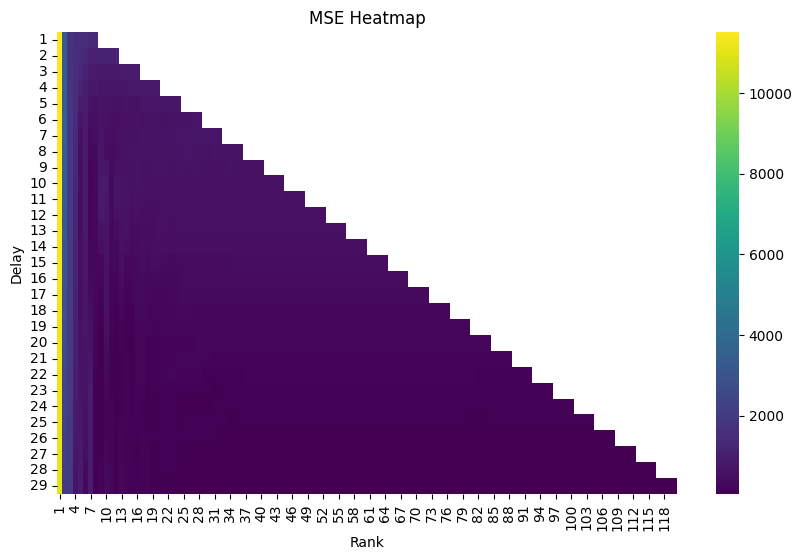

In [117]:
plt.figure(figsize=(10, 6))
sns.heatmap(mse_df_train, annot=False, cmap='viridis', fmt=".2f")
plt.title('MSE Heatmap')
plt.xlabel('Rank')
plt.ylabel('Delay')
plt.show()

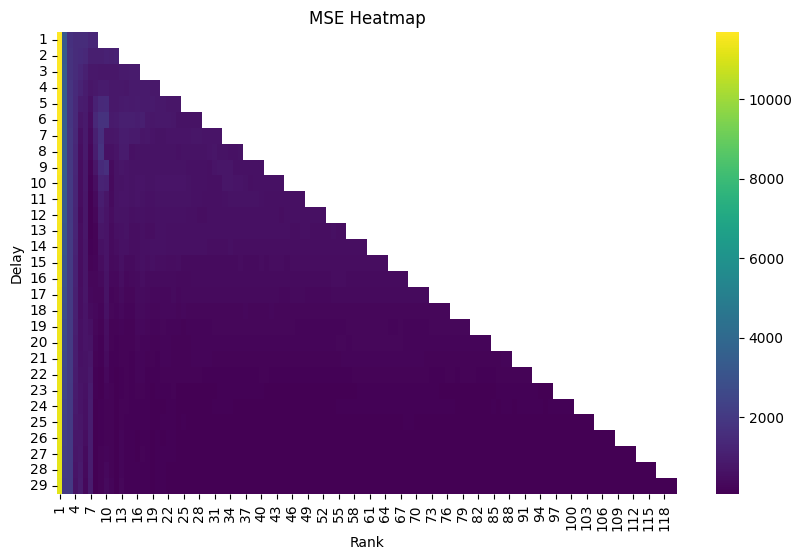

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(mse_df_valid, annot=False, cmap='viridis', fmt=".2f")
plt.title('MSE Heatmap')
plt.xlabel('Rank')
plt.ylabel('Delay')
plt.show()

/tmp/ipykernel_12640/2407646735.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


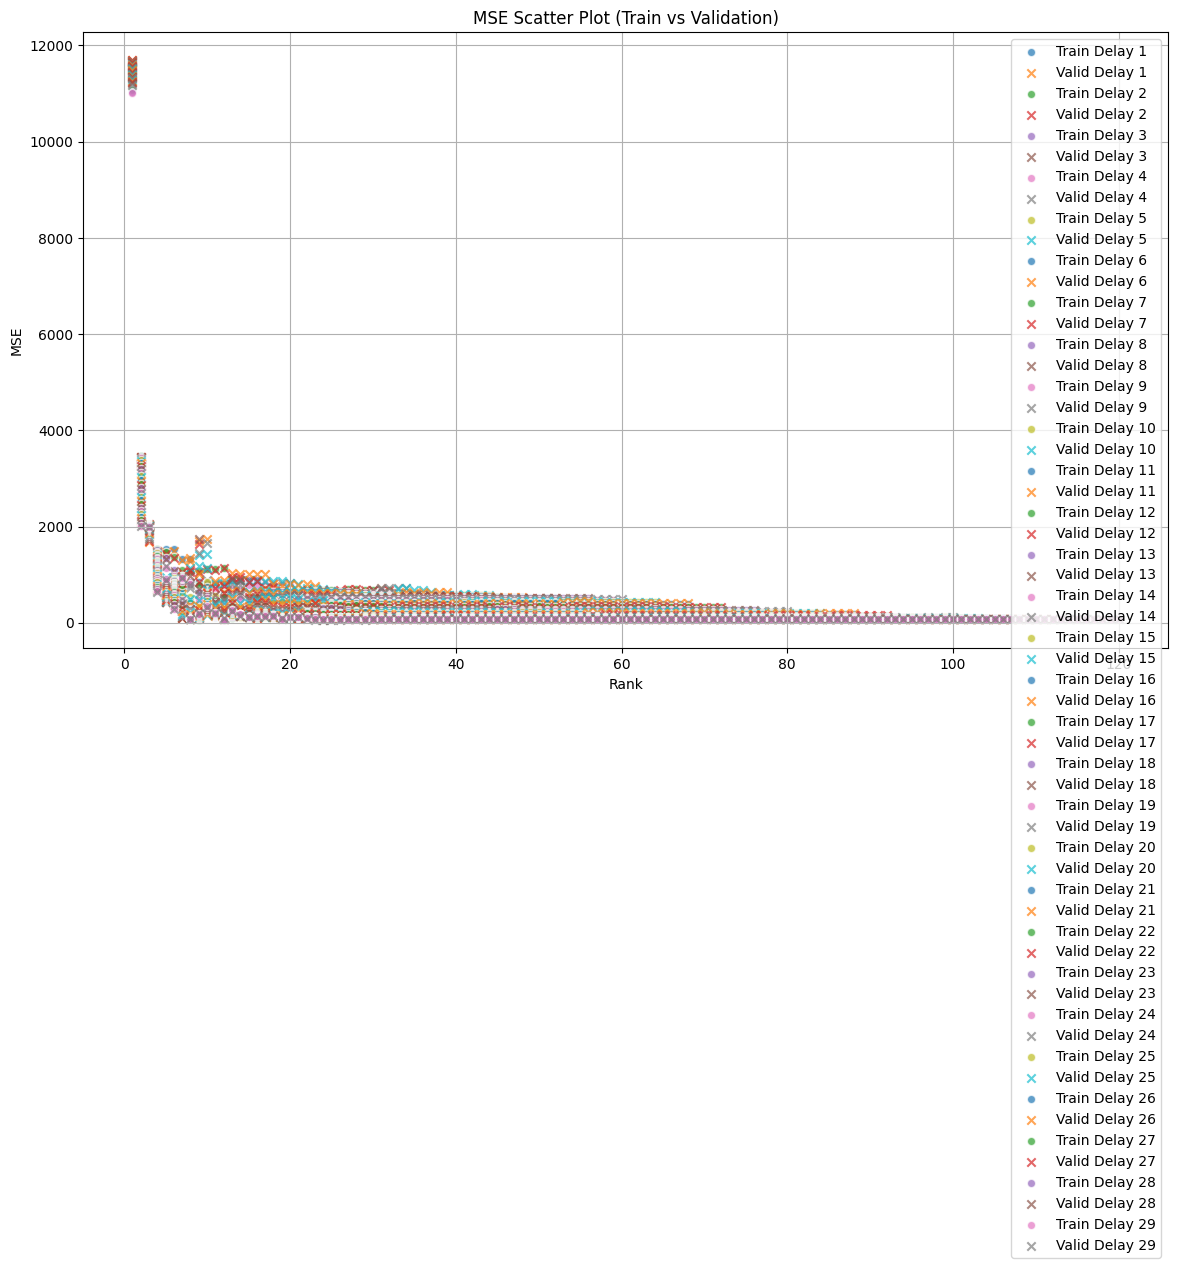

In [119]:
plt.figure(figsize=(14, 8))

for delay in mse_dict_train.keys():
    train_ranks = list(mse_dict_train[delay].keys())
    train_mse_values = list(mse_dict_train[delay].values())
    valid_ranks = list(mse_dict_valid[delay].keys())
    valid_mse_values = list(mse_dict_valid[delay].values())

    plt.scatter(train_ranks, train_mse_values, label=f'Train Delay {delay}', alpha=0.7, edgecolors='w')
    plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


plt.title('MSE Scatter Plot (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

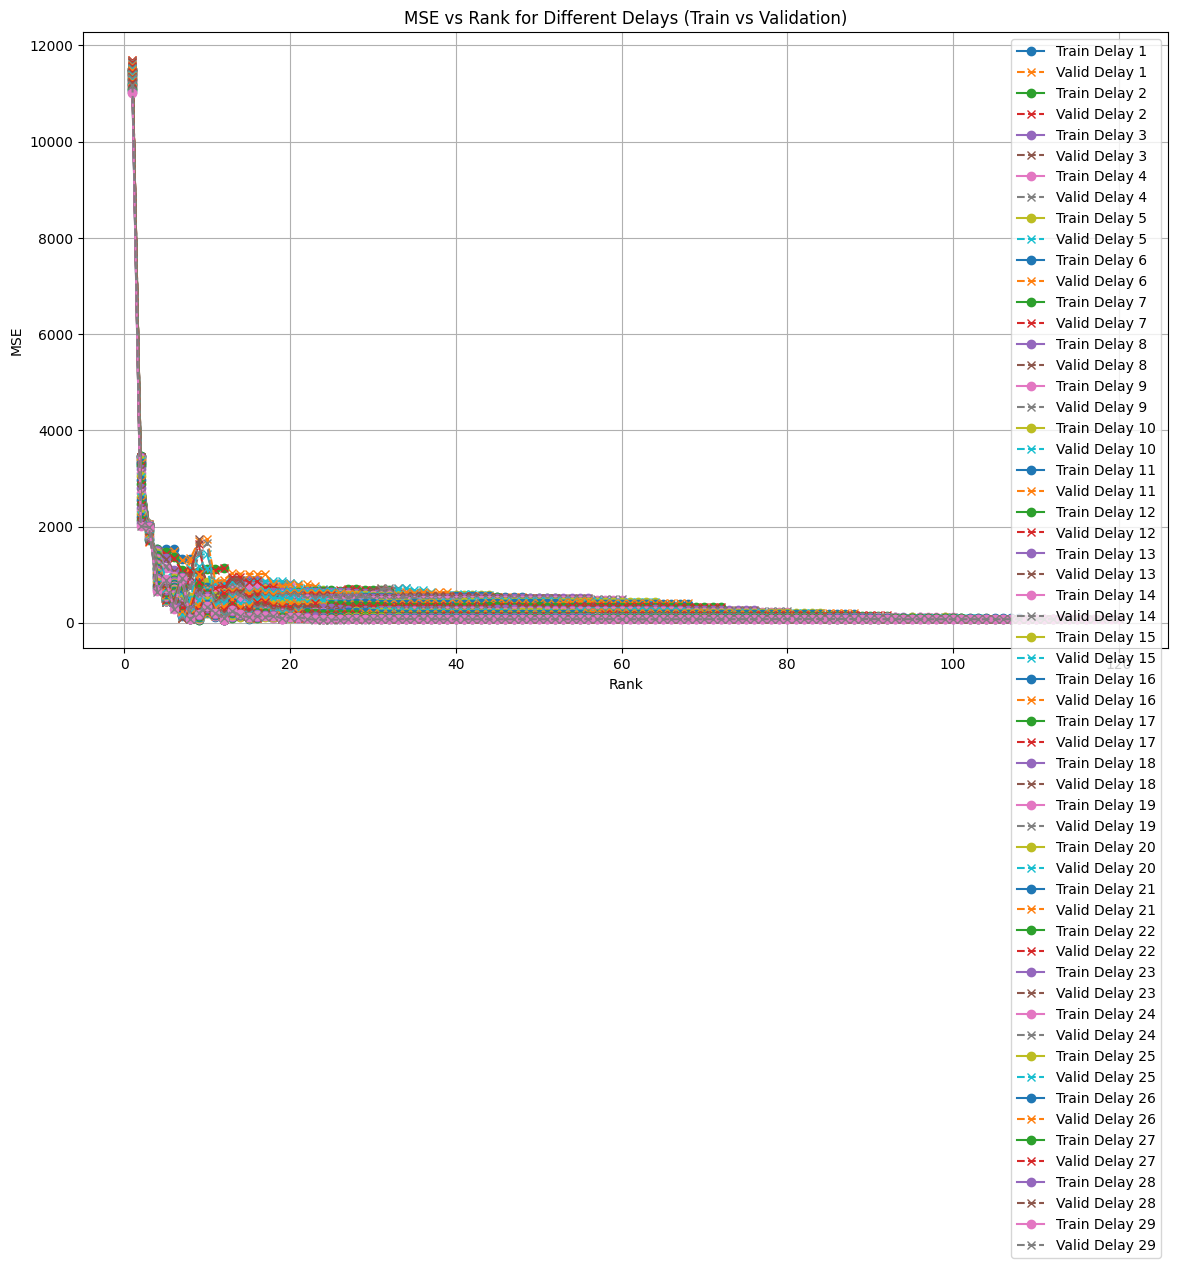

In [120]:
plt.figure(figsize=(14, 8))

for delay in mse_dict_train.keys():
    train_ranks = list(mse_dict_train[delay].keys())
    train_mse_values = list(mse_dict_train[delay].values())
    valid_ranks = list(mse_dict_valid[delay].keys())
    valid_mse_values = list(mse_dict_valid[delay].values())
    
    plt.plot(train_ranks, train_mse_values, marker='o', label=f'Train Delay {delay}', linestyle='-')
    plt.plot(valid_ranks, valid_mse_values, marker='x', label=f'Valid Delay {delay}', linestyle='--')

plt.title('MSE vs Rank for Different Delays (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
# Initialize variables to store the minimum MSE values and their corresponding delay and rank
min_train_mse = float('inf')
min_train_delay = None
min_train_rank = None

min_valid_mse = float('inf')
min_valid_delay = None
min_valid_rank = None

# Find the minimum MSE value for training data
for delay, ranks in mse_dict_train.items():
    for rank, mse in ranks.items():
        if mse < min_train_mse:
            min_train_mse = mse
            min_train_delay = delay
            min_train_rank = rank

# Find the minimum MSE value for validation data
for delay, ranks in mse_dict_valid.items():
    for rank, mse in ranks.items():
        if mse < min_valid_mse:
            min_valid_mse = mse
            min_valid_delay = delay
            min_valid_rank = rank

# Print the results
print(f"Minimum Training MSE: {min_train_mse} at Delay {min_train_delay}, Rank {min_train_rank}")
print(f"Minimum Validation MSE: {min_valid_mse} at Delay {min_valid_delay}, Rank {min_valid_rank}")


Minimum Training MSE: 55.159596904071634 at Delay 25, Rank 12
Minimum Validation MSE: 61.53419811840912 at Delay 29, Rank 24


/tmp/ipykernel_12640/3245755854.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


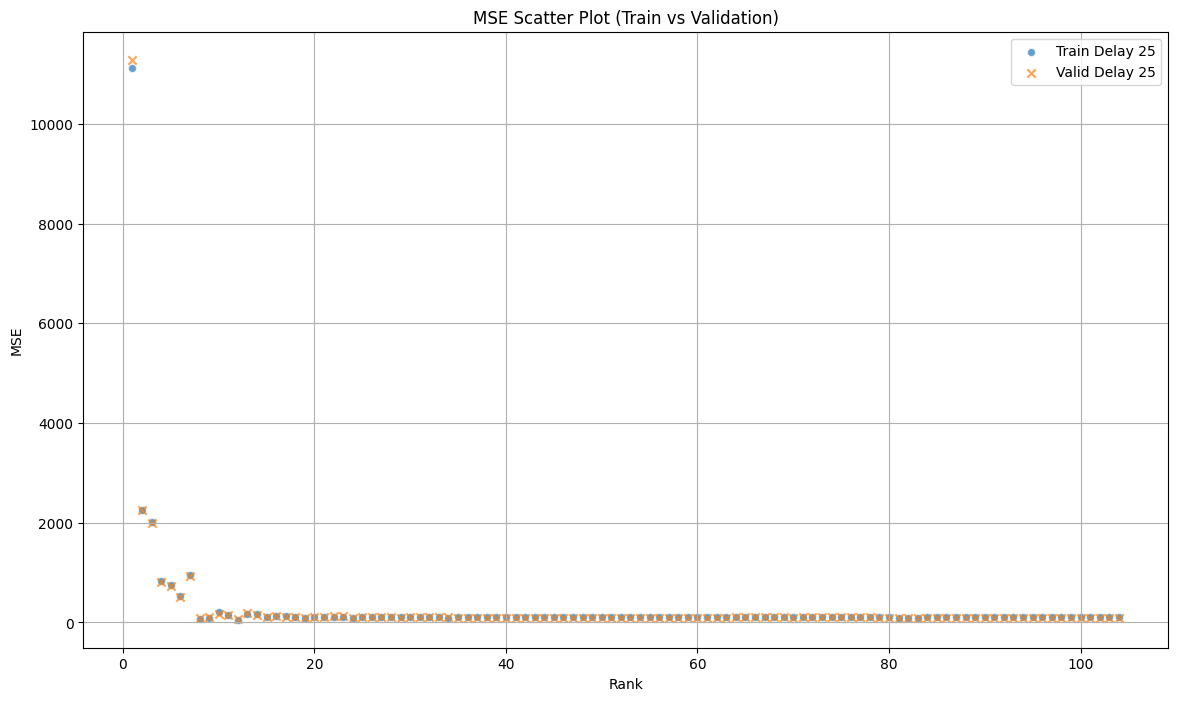

In [127]:
plt.figure(figsize=(14, 8))

delay=min_train_delay
train_ranks = list(mse_dict_train[delay].keys())
train_mse_values = list(mse_dict_train[delay].values())
valid_ranks = list(mse_dict_valid[delay].keys())
valid_mse_values = list(mse_dict_valid[delay].values())

plt.scatter(train_ranks, train_mse_values, label=f'Train Delay {delay}', alpha=0.7, edgecolors='w')
plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


plt.title('MSE Scatter Plot (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_12640/3369070579.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


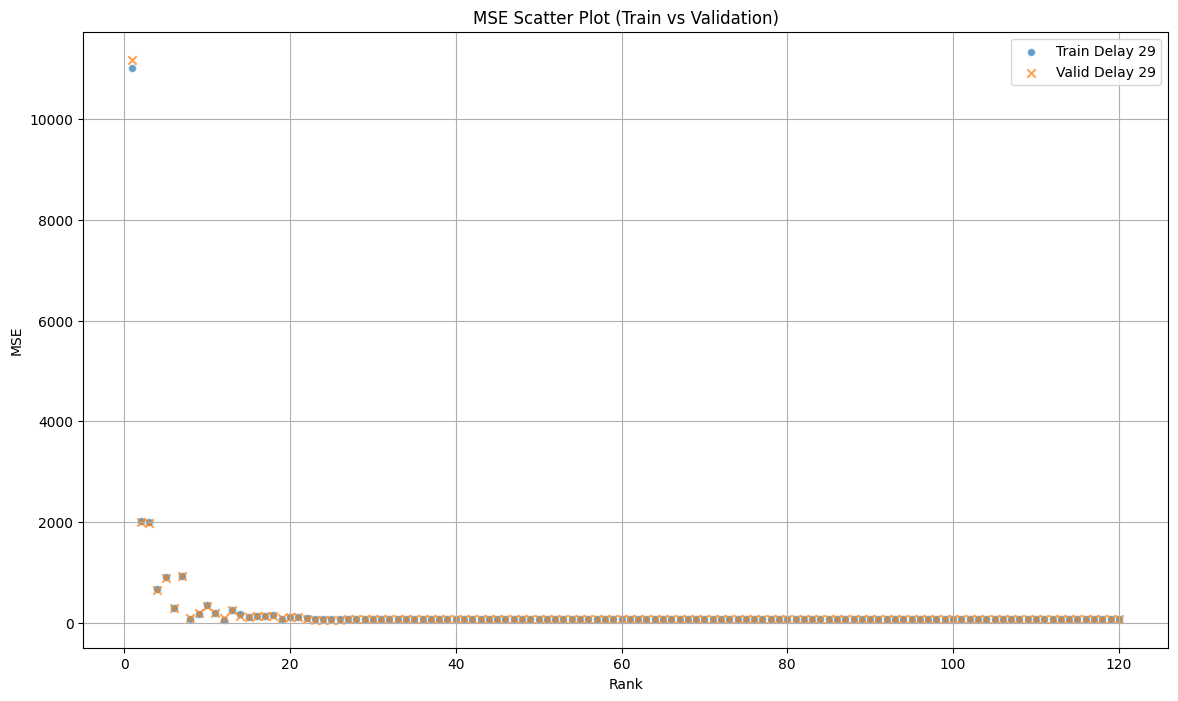

In [128]:
plt.figure(figsize=(14, 8))

delay=min_valid_delay
train_ranks = list(mse_dict_train[delay].keys())
train_mse_values = list(mse_dict_train[delay].values())
valid_ranks = list(mse_dict_valid[delay].keys())
valid_mse_values = list(mse_dict_valid[delay].values())

plt.scatter(train_ranks, train_mse_values, label=f'Train Delay {delay}', alpha=0.7, edgecolors='w')
plt.scatter(valid_ranks, valid_mse_values, label=f'Valid Delay {delay}', alpha=0.7, edgecolors='k', marker='x')


plt.title('MSE Scatter Plot (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

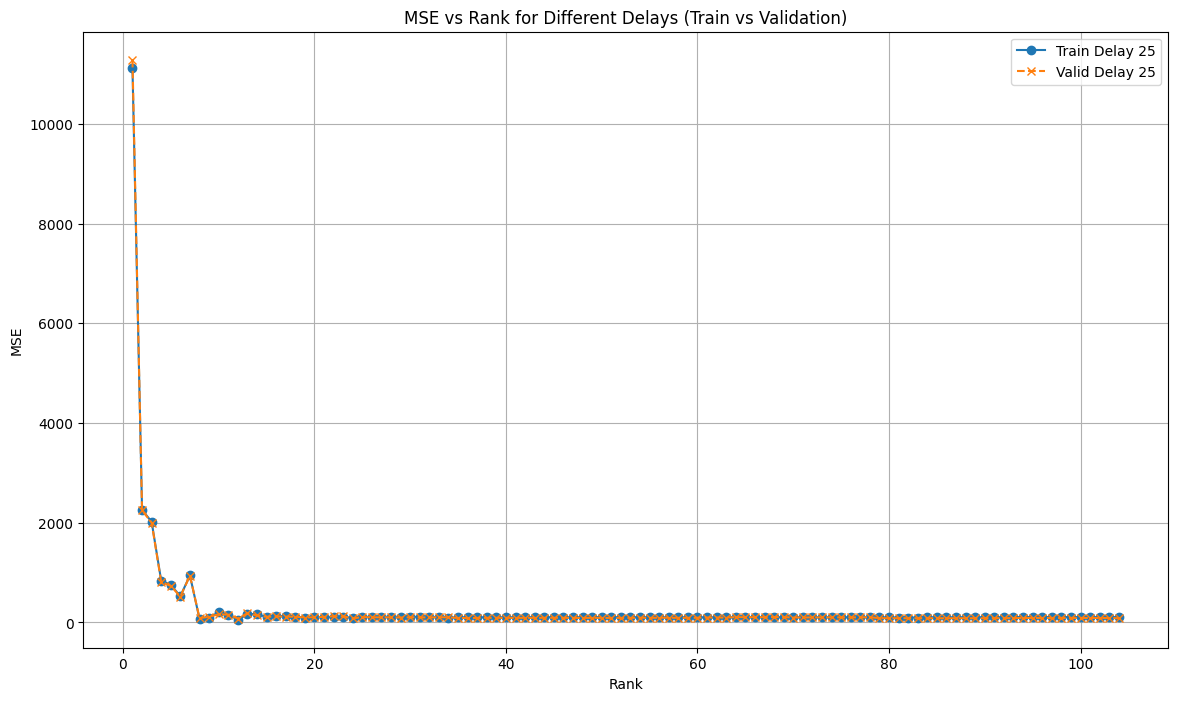

In [129]:
plt.figure(figsize=(14, 8))

delay=min_train_delay
train_ranks = list(mse_dict_train[delay].keys())
train_mse_values = list(mse_dict_train[delay].values())
valid_ranks = list(mse_dict_valid[delay].keys())
valid_mse_values = list(mse_dict_valid[delay].values())
    
plt.plot(train_ranks, train_mse_values, marker='o', label=f'Train Delay {delay}', linestyle='-')
plt.plot(valid_ranks, valid_mse_values, marker='x', label=f'Valid Delay {delay}', linestyle='--')

plt.title('MSE vs Rank for Different Delays (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

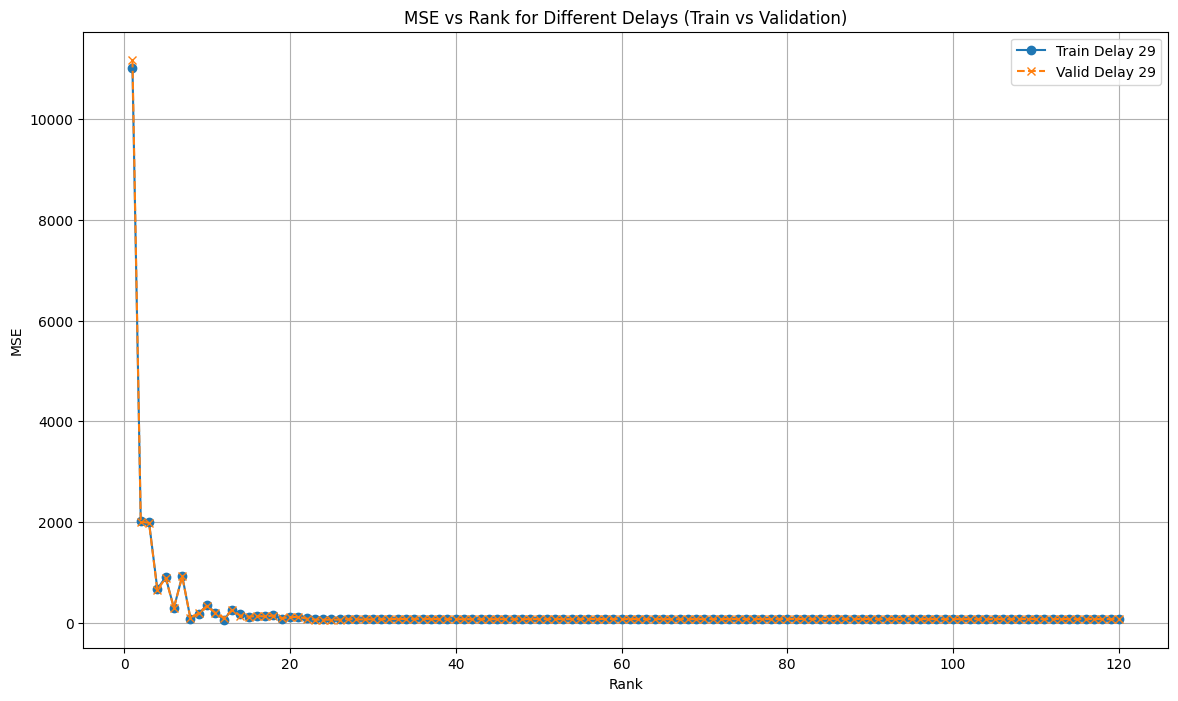

In [130]:
plt.figure(figsize=(14, 8))

delay=min_valid_delay
train_ranks = list(mse_dict_train[delay].keys())
train_mse_values = list(mse_dict_train[delay].values())
valid_ranks = list(mse_dict_valid[delay].keys())
valid_mse_values = list(mse_dict_valid[delay].values())
    
plt.plot(train_ranks, train_mse_values, marker='o', label=f'Train Delay {delay}', linestyle='-')
plt.plot(valid_ranks, valid_mse_values, marker='x', label=f'Valid Delay {delay}', linestyle='--')

plt.title('MSE vs Rank for Different Delays (Train vs Validation)')
plt.xlabel('Rank')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# Initialize variables to store the minimum MSE values and their corresponding delay and rank
min_train_rmse = float('inf')
min_train_delay = None
min_train_rank = None

min_valid_rmse = float('inf')
min_valid_delay = None
min_valid_rank = None

# Find the minimum MSE value for training data
for delay, ranks in rmse_dict_train.items():
    for rank, rmse in ranks.items():
        if rmse < min_train_rmse:
            min_train_rmse = rmse
            min_train_delay = delay
            min_train_rank = rank

# Find the minimum MSE value for validation data
for delay, ranks in rmse_dict_valid.items():
    for rank, rmse in ranks.items():
        if rmse < min_valid_rmse:
            min_valid_rmse = rmse
            min_valid_delay = delay
            min_valid_rank = rank

# Print the results
print(f"Minimum Training RMSE: {min_train_rmse} at Delay {min_train_delay}, Rank {min_train_rank}")
print(f"Minimum Validation RMSE: {min_valid_rmse} at Delay {min_valid_delay}, Rank {min_valid_rank}")

Minimum Training RMSE: 7.426950713723071 at Delay 25, Rank 12
Minimum Validation RMSE: 7.844373660045085 at Delay 29, Rank 24


In [125]:
num_columns = x_tsc_input.shape[1]

time_delay_embed = TSCTakensEmbedding(delays=min_valid_delay, lag=0, frequency=1, kappa=0).fit(x_tsc_input)
embed_values_input_delay = time_delay_embed.transform(x_tsc_input)
embed_values_test_delay = time_delay_embed.transform(x_tsc_test)

x_time_delay_test_init = x_tsc_test.iloc[min_mse_delay_tde_key:]

dmd = models.dmd(embed_values_input_delay, rank = min_valid_rank)
    
dmd_values_new_test_delay = dmd.predict(embed_values_test_delay.initial_states(), time_values=embed_values_test_delay.time_values())
x_alternate_test_delay = time_delay_embed.inverse_transform(dmd_values_new_test_delay)
test_tde_dmd_mae, test_tde_dmd_mse, test_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_test_init, x_alternate_test_delay)


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


In [126]:
print('Testing error')
print(f"Testing mae:{test_tde_dmd_mae}")
print(f"Testing mse:{test_tde_dmd_mse}")
print(f"Testing rmse:{test_tde_dmd_rmse}")

Testing error
Testing mae:3.869777322094638
Testing mse:87.8149943331805
Testing rmse:9.370965496317895


In [66]:
last_column_df

measurement_area5
id timeStep                   
0  1                      1000
   2                      1000
   3                      1000
   4                      1000
   5                      1000
...                        ...
9  1247                      0
   1248                      0
   1249                      0
   1250                      0
   1251                      0

[12510 rows x 1 columns]

In [96]:
def find_first_zero(df):
    result = {}
    for id_val in df.index.get_level_values('id').unique():
        # Get the sub-DataFrame for the current id
        sub_df = df.loc[id_val]
        # Find the first occurrence of 0
        first_zero_timestep = sub_df[sub_df['measurement_area5'] == 0].index.min()
        result[id_val] = first_zero_timestep
    return result

In [98]:
data_final

measurement_area1  measurement_area2  measurement_area3  \
id timeStep                                                            
0  1                     209.0              203.0                0.0   
   2                     209.0              203.0                0.0   
   3                     199.0              203.0                0.0   
   4                     190.0              206.0                0.0   
   5                     177.0              207.0                0.0   
...                        ...                ...                ...   
9  1247                    0.0                0.0                0.0   
   1248                    0.0                0.0                0.0   
   1249                    0.0                0.0                0.0   
   1250                    0.0                0.0                0.0   
   1251                    0.0                0.0                0.0   

             measurement_area4  
id timeStep                     
0  1                       0.0  
   2                       0.0  
   3                       0.0  
   4                       0.0  
   5                       0.0  
...                        ...  
9  1247                    0.0  
   1248                    0.0  
   1249                    0.0  
   1250                    0.0  
   1251                    0.0  

[12510 rows x 4 columns]

In [101]:
sums = data_final.sum(axis=1)

# Find the timestep where the sum is zero or minimum for each id
results = sums.groupby('id').idxmin()

# If you need the minimum values as well
min_values = sums.groupby('id').min()

# Display the results
print("Timestep at which the sum of entries of all columns is minimum or zero for each id:")
print(results)

Timestep at which the sum of entries of all columns is minimum or zero for each id:
id
0    (0, 611)
1    (1, 629)
2    (2, 616)
3    (3, 630)
4    (4, 633)
5    (5, 616)
6    (6, 619)
7    (7, 620)
8    (8, 629)
9    (9, 623)
dtype: object


In [100]:
first_zero_timesteps = find_first_zero(last_column_df)
first_zero_timesteps

{0: 613,
 1: 630,
 2: 618,
 3: 632,
 4: 635,
 5: 618,
 6: 622,
 7: 622,
 8: 631,
 9: 625}

In [ ]:
x_time_delay_train_tde_init[x_time_delay_train_tde_init<1]=0
x_time_delay_valid_tde_init[x_time_delay_valid_tde_init<1]=0
x_alternate_train_tde[x_alternate_train_tde<1]=0
x_alternate_valid_tde[x_alternate_valid_tde<1] =0
x_alternate_valid_tde

In [111]:
sums_train_init = x_time_delay_train_tde_init.sum(axis=1)
sums_train_predict =x_alternate_train_tde.sum(axis=1)

# Find the timestep where the sum is zero or minimum for each id
results_train_init = sums_train_init.groupby('ID').idxmin()
results_train_predict = sums_train_predict.groupby('ID').idxmin()

# If you need the minimum values as well
min_values_train_init = sums_train_init.groupby('ID').min()
min_values_train_predict = sums_train_predict.groupby('ID').min()

# Display the results
print("Timestep at which the sum of entries of all columns is minimum or zero for each id:")
print(results_train_init)
print("Timestep at which the sum of entries of all columns is minimum or zero for each id:")
print(results_train_predict)

Timestep at which the sum of entries of all columns is minimum or zero for each id:
ID
0    (0, 629)
1    (1, 611)
2    (2, 633)
3    (3, 623)
4    (4, 619)
5    (5, 616)
dtype: object
Timestep at which the sum of entries of all columns is minimum or zero for each id:
ID
0    (0, 715)
1    (1, 715)
2    (2, 716)
3    (3, 715)
4    (4, 715)
5    (5, 714)
dtype: object


In [112]:
sums_valid_init = x_time_delay_valid_tde_init.sum(axis=1)
sums_valid_predict =x_alternate_valid_tde.sum(axis=1)

# Find the timestep where the sum is zero or minimum for each id
results_valid_init = sums_valid_init.groupby('ID').idxmin()
results_valid_predict = sums_valid_predict.groupby('ID').idxmin()

# If you need the minimum values as well
min_values_valid_init = sums_valid_init.groupby('ID').min()
min_values_valid_predict = sums_valid_predict.groupby('ID').min()

# Display the results
print("Timestep at which the sum of entries of all columns is minimum or zero for each id:")
print(results_valid_init)
print("Timestep at which the sum of entries of all columns is minimum or zero for each id:")
print(results_valid_predict)

Timestep at which the sum of entries of all columns is minimum or zero for each id:
ID
0    (0, 629)
1    (1, 630)
dtype: object
Timestep at which the sum of entries of all columns is minimum or zero for each id:
ID
0    (0, 715)
1    (1, 718)
dtype: object


In [138]:
time_delay_embed = TSCTakensEmbedding(delays=10, lag=0, frequency=1, kappa=0).fit(x_tsc_train)
embed_values_train = time_delay_embed.transform(x_tsc_train)
embed_values_valid = time_delay_embed.transform(x_tsc_valid)
num_columns = embed_values_train.shape[1]

x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

edmd_poly = models.edmd_poly(embed_values_train, degree=2)
edmd_poly_values_train = edmd_poly.predict(
    embed_values_train.initial_states(), time_values=embed_values_train.time_values()
)

x_predicted_edmd_poly_train = time_delay_embed.inverse_transform(edmd_poly_values_train)

edmd_poly_mae_train, edmd_poly_mse_train, edmd_poly_rmse_train, _, _ = errors.compiled_errors(x_time_delay_train_tde_init, x_predicted_edmd_poly_train)

edmd_poly_values_valid = edmd_poly.predict(
    embed_values_valid.initial_states(), time_values=embed_values_valid.time_values()
)

x_predicted_edmd_poly_valid = time_delay_embed.inverse_transform(edmd_poly_values_valid)

edmd_poly_mae_valid, edmd_poly_mse_valid, edmd_poly_rmse_valid, _, _ = errors.compiled_errors(x_time_delay_valid_tde_init, x_predicted_edmd_poly_valid)

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(1034, 1034)) has not full rank (linregress_model.rank_=764), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a fut

In [141]:
x_predicted_edmd_poly_valid

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  11         1.230000e+02         221.000000          28.000000   
   12         1.129179e+02         214.550692         237.896668   
   13         1.290223e+02         243.594897         367.884411   
   14         1.189183e+02         -74.666830         269.247814   
   15         1.089176e+02         -78.513954         239.659924   
...                    ...                ...                ...   
1  1247      -7.287588e-07          -0.000002           0.000172   
   1248      -7.332330e-07          -0.000002           0.000173   
   1249      -7.376504e-07          -0.000002           0.000173   
   1250      -7.420108e-07          -0.000002           0.000173   
   1251      -7.463138e-07          -0.000001           0.000174   

feature  measurement_area4  
ID time                     
0  11         1.647855e-07  
   12        -1.981489e+02  
   13         1.120627e+01  
   14         6.570358e+02  
   15        -9.270135e+01  
...                    ...  
1  1247       3.398420e-01  
   1248       3.364905e-01  
   1249       3.331572e-01  
   1250       3.298421e-01  
   1251       3.265452e-01  

[2482 rows x 4 columns]

In [139]:
edmd_poly_mse_train

23.765722604270003

In [140]:
edmd_poly_mse_valid

310756.2371076245

In [135]:
edmd_train_error_tde2 = {}
edmd_valid_error_tde2 = {}
for delay in range(1,3):
    time_delay_embed = TSCTakensEmbedding(delays=10, lag=0, frequency=1, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    edmd_poly = models.edmd_poly(embed_values_train, degree=2)
    edmd_poly_values_train = edmd_poly.predict(
        embed_values_train.initial_states(), time_values=embed_values_train.time_values()
    )

    x_predicted_edmd_poly_train = time_delay_embed.inverse_transform(edmd_poly_values_train)

    edmd_poly_mae_train, edmd_poly_mse_train, edmd_poly_rmse_train, _, _ = errors.compiled_errors(x_time_delay_train_tde_init, x_predicted_edmd_poly_train)
    edmd_train_error_tde2[delay] = {'mae': edmd_poly_mae_train, 'mse' : edmd_poly_mse_train, 'rmse': edmd_poly_rmse_train}

    edmd_poly_values_valid = edmd_poly.predict(
        embed_values_valid.initial_states(), time_values=embed_values_valid.time_values()
    )

    x_predicted_edmd_poly_valid = time_delay_embed.inverse_transform(edmd_poly_values_valid)

    edmd_poly_mae_valid, edmd_poly_mse_valid, edmd_poly_rmse_valid, _, _ = errors.compiled_errors(x_time_delay_valid_tde_init, x_predicted_edmd_poly_valid)
    edmd_valid_error_tde2[delay] = {'mae': edmd_poly_mae_valid, 'mse' : edmd_poly_mse_valid, 'rmse': edmd_poly_rmse_valid}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(1034, 1034)) has not full rank (linregress_model.rank_=764), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a fut

In [148]:
edmd_train_error_tde2

{1: {'mae': 1.7380834380115222,
  'mse': 23.765722604270003,
  'rmse': 4.875010010684081},
 2: {'mae': 1.7380834380115222,
  'mse': 23.765722604270003,
  'rmse': 4.875010010684081}}

In [137]:
edmd_valid_error_tde2

{1: {'mae': 134.26087809489488,
  'mse': 310756.2371076244,
  'rmse': 557.4551435834317},
 2: {'mae': 134.26087809489488,
  'mse': 310756.2371076245,
  'rmse': 557.4551435834317}}

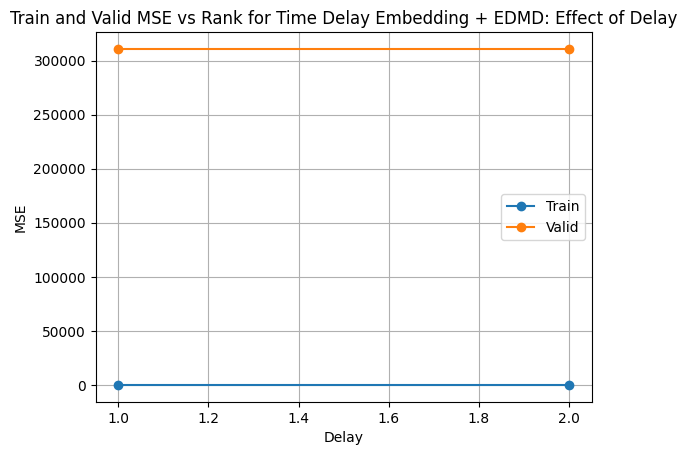

In [136]:
delays = list(edmd_train_error_tde2.keys())
train_tde_mse_values = [edmd_train_error_tde2[delay]['mse'] for delay in delays]
valid_tde_mse_values = [edmd_valid_error_tde2[delay]['mse'] for delay in delays]

# Create the plot
plt.plot(delays, train_tde_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_tde_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding + EDMD: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
delays = list(edmd_train_error_tde2.keys())
train_tde_rmse_values = [edmd_train_error_tde2[delay]['rmse'] for delay in delays]
valid_tde_rmse_values = [edmd_valid_error_tde2[delay]['rmse'] for delay in delays]

# Create the plot
plt.plot(delays, train_tde_rmse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_tde_rmse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('RMSE')
plt.title('Train and Valid RMSE vs Rank for Time Delay Embedding + DMD: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
time_delay_embed = TSCTakensEmbedding(delays=10, lag=0, frequency=1, kappa=0).fit(x_tsc_train)
embed_values_train = time_delay_embed.transform(x_tsc_train)
embed_values_valid = time_delay_embed.transform(x_tsc_valid)
num_columns = embed_values_train.shape[1]

x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

edmd_rbf = models.edmd_rbf(embed_values_train, epsilon = 0.17)
edmd_rbf_values_train = edmd_rbf.predict(
    embed_values_train.initial_states(), time_values=embed_values_train.time_values()
)

x_predicted_edmd_rbf_train = time_delay_embed.inverse_transform(edmd_rbf_values_train)

edmd_rbf_mae_train, edmd_rbf_mse_train, edmd_rbf_rmse_train, _, _ = errors.compiled_errors(x_time_delay_train_tde_init, x_predicted_edmd_rbf_train)

edmd_rbf_values_valid = edmd_rbf.predict(
    embed_values_valid.initial_states(), time_values=embed_values_valid.time_values()
)

x_predicted_edmd_rbf_valid = time_delay_embed.inverse_transform(edmd_rbf_values_valid)

edmd_rbf_mae_valid, edmd_rbf_mse_valid, edmd_rbf_rmse_valid, _, _ = errors.compiled_errors(x_time_delay_valid_tde_init, x_predicted_edmd_rbf_valid)

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than observables. This may result in a bad computational performance.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(7490, 7490)) has not full rank (linregress_model.rank_=3708), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupb

In [145]:
x_predicted_edmd_rbf_valid

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  11         1.229974e+02       2.210001e+02       2.799985e+01   
   12         1.138024e+02       2.164324e+02       3.347039e+01   
   13         1.041933e+02       2.144479e+02       3.912125e+01   
   14         9.336157e+01       2.112206e+02       4.517859e+01   
   15         8.296218e+01       2.077654e+02       4.678070e+01   
...                    ...                ...                ...   
1  1247       3.908217e-10      -1.338739e-09       8.101767e-09   
   1248       3.908220e-10      -1.338752e-09       8.101733e-09   
   1249       3.908221e-10      -1.338738e-09       8.101494e-09   
   1250       3.908226e-10      -1.338747e-09       8.101682e-09   
   1251       3.908231e-10      -1.338723e-09       8.101865e-09   

feature  measurement_area4  
ID time                     
0  11        -3.231717e-05  
   12        -2.252961e+00  
   13        -6.604642e+00  
   14        -1.123993e+01  
   15        -1.517354e+01  
...                    ...  
1  1247      -1.702632e-07  
   1248      -1.700638e-07  
   1249      -1.701264e-07  
   1250      -1.700360e-07  
   1251      -1.699962e-07  

[2482 rows x 4 columns]

In [146]:
edmd_rbf_mse_train

286.72848706341244

In [147]:
edmd_rbf_mse_valid

1048.779635507248

In [223]:
import itertools
# Lists of parameter values
delay_values = [5,10,15,20,25,30]
lag_values = [0, 1]
frequency_values = [1, 2, 3]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}


/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [226]:
valid_error_tde2

{(5, 0, 1): {'mae': 12.26188265925331,
  'mse': 702.9859497671223,
  'rmse': 26.51388220851715},
 (5, 0, 2): {'mae': 11.405184209141213,
  'mse': 583.9295595935012,
  'rmse': 24.164634480858616},
 (5, 0, 3): {'mae': 10.841856717365712,
  'mse': 564.4184386896121,
  'rmse': 23.757492264328153},
 (5, 1, 1): {'mae': 11.745723090616302,
  'mse': 618.8541310217146,
  'rmse': 24.876778951900395},
 (5, 1, 2): {'mae': 11.392534646932376,
  'mse': 595.5043296001901,
  'rmse': 24.402957394549336},
 (5, 1, 3): {'mae': 10.278897499333961,
  'mse': 517.8783621818774,
  'rmse': 22.756940967139617},
 (10, 0, 1): {'mae': 11.076526542698145,
  'mse': 572.2276421688466,
  'rmse': 23.921280111416415},
 (10, 0, 2): {'mae': 7.100742038980945,
  'mse': 295.3055138928446,
  'rmse': 17.18445558907365},
 (10, 0, 3): {'mae': 4.02944231474383,
  'mse': 100.78409806933588,
  'rmse': 10.039128352070009},
 (10, 1, 1): {'mae': 10.343798734220023,
  'mse': 527.8012399431375,
  'rmse': 22.973925218454454},
 (10, 1, 2)

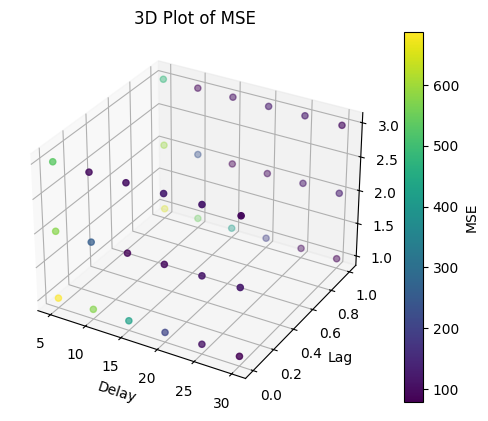

In [225]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    delays.append(delay)
    lags.append(lag)
    frequencies.append(frequency)
    mse_values.append(errors['mse'])

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
sc = ax.scatter(delays, lags, frequencies, c=mse_values, cmap='viridis')
ax.set_xlabel('Delay')
ax.set_ylabel('Lag')
ax.set_zlabel('Frequency')
plt.colorbar(sc, label='MSE')

plt.title('3D Plot of MSE')
plt.show()


In [229]:
import itertools
# Lists of parameter values
delay_values = [10,20,30,40,50,60,70]
lag_values = [0]
frequency_values = [1]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
train_mse_values = []
valid_mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    delays.append(delay)
    train_mse_values.append(errors['mse'])

for (delay, lag, frequency), errors in valid_error_tde2.items():
    valid_mse_values.append(errors['mse'])

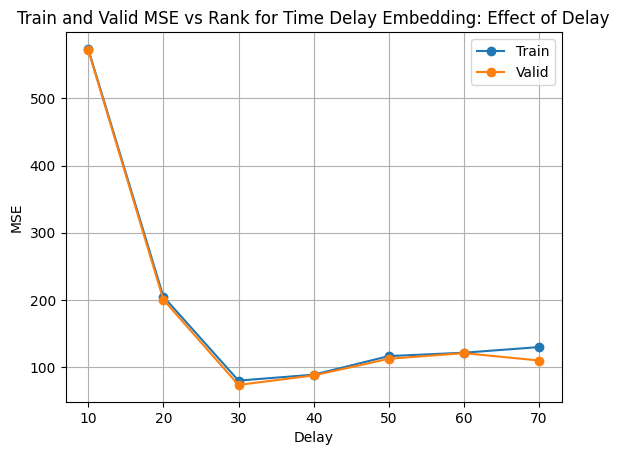

In [235]:
# Create the plot
plt.plot(delays, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [238]:
import itertools
# Lists of parameter values
delay_values = [20,22,25,27,30,32,35,37,40]
lag_values = [0]
frequency_values = [1]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

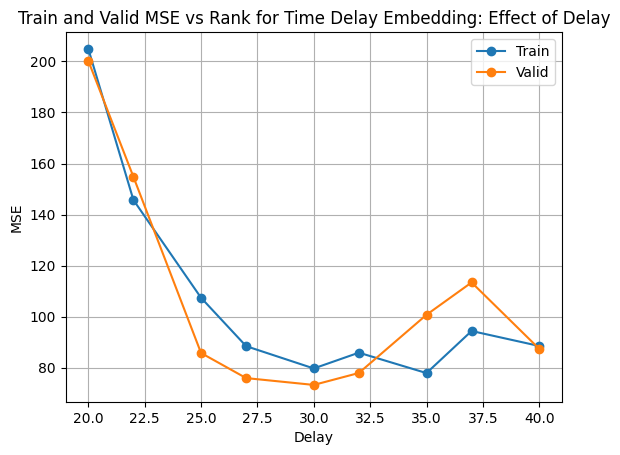

In [239]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
train_mse_values = []
valid_mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    delays.append(delay)
    train_mse_values.append(errors['mse'])

for (delay, lag, frequency), errors in valid_error_tde2.items():
    valid_mse_values.append(errors['mse'])

# Create the plot
plt.plot(delays, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
import itertools
import errors
# Lists of parameter values
delay_values = [30]
lag_values = [0,1,2,3,4,5,6,7,8,9]
frequency_values = [1]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

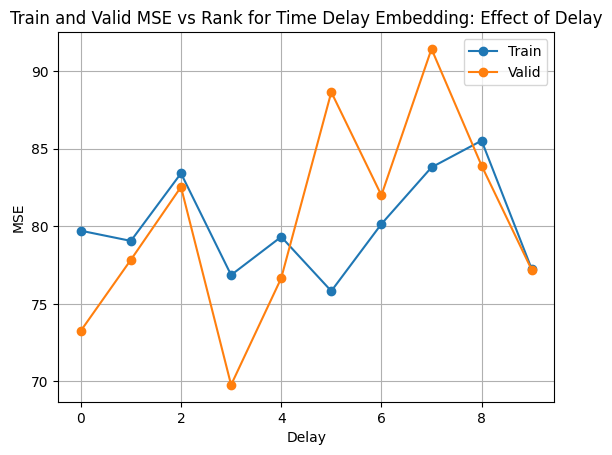

In [242]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
train_mse_values = []
valid_mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    lags.append(lag)
    train_mse_values.append(errors['mse'])

for (delay, lag, frequency), errors in valid_error_tde2.items():
    valid_mse_values.append(errors['mse'])

# Create the plot
plt.plot(lags, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(lags, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [245]:
import itertools
import errors
# Lists of parameter values
delay_values = [30]
lag_values = [3]
frequency_values = [1,3,5,7,9,11,13,15,17,19]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [248]:
dmd_values_valid_tde_new

feature  measurement_area1  measurement_area2  measurement_area3  \
ID time                                                            
0  556       -6.976613e-12       3.334621e-12       1.741181e-11   
   557        0.000000e+00       0.000000e+00       0.000000e+00   
   558        0.000000e+00       0.000000e+00       0.000000e+00   
   559        0.000000e+00       0.000000e+00       0.000000e+00   
   560        0.000000e+00       0.000000e+00       0.000000e+00   
...                    ...                ...                ...   
1  1247       0.000000e+00       0.000000e+00       0.000000e+00   
   1248       0.000000e+00       0.000000e+00       0.000000e+00   
   1249       0.000000e+00       0.000000e+00       0.000000e+00   
   1250       0.000000e+00       0.000000e+00       0.000000e+00   
   1251       0.000000e+00       0.000000e+00       0.000000e+00   

feature  measurement_area4  measurement_area1:d4  measurement_area2:d4  \
ID time                                                                  
0  556           49.000000          1.227818e-11         -1.600142e-11   
   557           48.907781          0.000000e+00          0.000000e+00   
   558           48.456663          0.000000e+00          0.000000e+00   
   559           47.798748          0.000000e+00          0.000000e+00   
   560           47.021072          0.000000e+00          0.000000e+00   
...                    ...                   ...                   ...   
1  1247          -0.006717          0.000000e+00          0.000000e+00   
   1248          -0.006727          0.000000e+00          0.000000e+00   
   1249          -0.006736          0.000000e+00          0.000000e+00   
   1250          -0.006742          0.000000e+00          0.000000e+00   
   1251          -0.006747          0.000000e+00          0.000000e+00   

feature  measurement_area3:d4  measurement_area4:d4  measurement_area1:d23  \
ID time                                                                      
0  556          -9.814372e-14             53.000000          -1.236344e-12   
   557           0.000000e+00             52.220966           0.000000e+00   
   558           0.000000e+00             51.588551           0.000000e+00   
   559           0.000000e+00             50.958391           0.000000e+00   
   560           0.000000e+00             50.264291           0.000000e+00   
...                       ...                   ...                    ...   
1  1247          0.000000e+00             -0.003606           0.000000e+00   
   1248          0.000000e+00             -0.003673           0.000000e+00   
   1249          0.000000e+00             -0.003738           0.000000e+00   
   1250          0.000000e+00             -0.003801           0.000000e+00   
   1251          0.000000e+00             -0.003862           0.000000e+00   

feature  measurement_area2:d23  ...  measurement_area3:d517  \
ID time                         ...                           
0  556           -1.501022e-12  ...              167.000000   
   557            0.000000e+00  ...              173.526106   
   558            0.000000e+00  ...              177.421856   
   559            0.000000e+00  ...              179.951820   
   560            0.000000e+00  ...              181.748495   
...                        ...  ...                     ...   
1  1247           0.000000e+00  ...                0.081848   
   1248           0.000000e+00  ...                0.082489   
   1249           0.000000e+00  ...                0.083099   
   1250           0.000000e+00  ...                0.083677   
   1251           0.000000e+00  ...                0.084223   

feature  measurement_area4:d517  measurement_area1:d536  \
ID time                                                   
0  556                32.000000               56.000000   
   557                36.012810               49.232521   
   558                41.235611               42.635152   
   559                

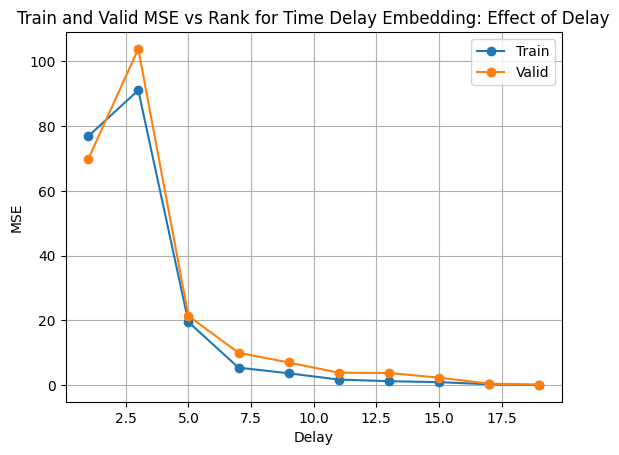

In [246]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
train_mse_values = []
valid_mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    frequencies.append(frequency)
    train_mse_values.append(errors['mse'])

for (delay, lag, frequency), errors in valid_error_tde2.items():
    valid_mse_values.append(errors['mse'])

# Create the plot
plt.plot(frequencies, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(frequencies, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

In [270]:
import itertools
import errors
# Lists of parameter values
delay_values = [20]
lag_values = [3]
frequency_values = [10,15,20,25,30]

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(delay_values, lag_values, frequency_values))

train_error_tde2 = {}
valid_error_tde2 = {}

for delay, lag, frequency in parameter_combinations:
    time_delay_embed = TSCTakensEmbedding(delays=delay, lag=lag, frequency=frequency, kappa=0).fit(x_tsc_train)
    embed_values_train = time_delay_embed.transform(x_tsc_train)
    embed_values_valid = time_delay_embed.transform(x_tsc_valid)
    num_columns = embed_values_train.shape[1]

    x_time_delay_train_tde_init = x_tsc_train.iloc[delay:]
    x_time_delay_valid_tde_init = x_tsc_valid.iloc[delay:]

    dmd = models.dmd(embed_values_train)
    dmd_values_train_tde_new = dmd.predict(embed_values_train.initial_states(), time_values=embed_values_train.time_values())
    x_predicted_dmd_train_tde_new = dmd_values_train_tde_new

    x_alternate_train_tde = time_delay_embed.inverse_transform(dmd_values_train_tde_new)
    train_tde_dmd_mae, train_tde_dmd_mse, train_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_train_tde_init, x_alternate_train_tde)
    train_error_tde2[(delay, lag, frequency)] = {'mae': train_tde_dmd_mae, 'mse' : train_tde_dmd_mse, 'rmse': train_tde_dmd_rmse}
    
    dmd_values_valid_tde_new = dmd.predict(embed_values_valid.initial_states(), time_values=embed_values_valid.time_values())
    x_predicted_dmd_valid_tde_new = dmd_values_valid_tde_new

    x_alternate_valid_tde = time_delay_embed.inverse_transform(dmd_values_valid_tde_new)
    valid_tde_dmd_mae, valid_tde_dmd_mse, valid_tde_dmd_rmse,_,_ = errors.compiled_errors(x_time_delay_valid_tde_init, x_alternate_valid_tde)
    valid_error_tde2[(delay, lag, frequency)] = {'mae': valid_tde_dmd_mae, 'mse' : valid_tde_dmd_mse, 'rmse': valid_tde_dmd_rmse}

/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(84, 84)) has not full rank (linregress_model.rank_=55), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/thesis/masters-thesis-parametric-dmd-in-crowd-simulation/Bottleneck/my_env2_thesis/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future v

In [271]:
min_mse = float('inf')
min_params = None

# Iterate through the dictionary to find the minimum MSE and its parameters
for params, errors in train_error_tde2.items():
    mse = errors['mse']
    if mse < min_mse:
        min_mse = mse
        min_params = params

print(min_mse)
print(min_params)

0.03143359884395582
(20, 3, 30)


In [272]:
min_mse = float('inf')
min_params = None

# Iterate through the dictionary to find the minimum MSE and its parameters
for params, errors in valid_error_tde2.items():
    mse = errors['mse']
    if mse < min_mse:
        min_mse = mse
        min_params = params

print(min_mse)
print(min_params)

0.08329995438189942
(20, 3, 30)


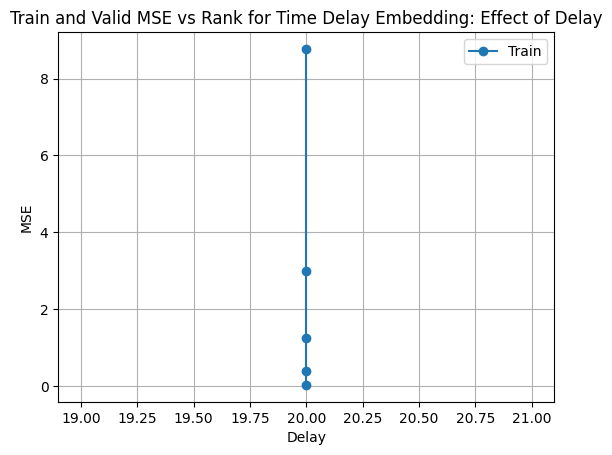

In [273]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract parameters and MSE values
delays = []
lags = []
frequencies = []
train_mse_values = []
valid_mse_values = []

for (delay, lag, frequency), errors in train_error_tde2.items():
    delays.append(delay)
    lags.append(lag)
    frequencies.append(frequency)
    train_mse_values.append(errors['mse'])

for (delay, lag, frequency), errors in valid_error_tde2.items():
    valid_mse_values.append(errors['mse'])

# Create the plot
plt.plot(delays, train_mse_values, marker='o', linestyle='-', label='Train')
# plt.plot(delays, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Delay')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Delay')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (0,) and (5,)

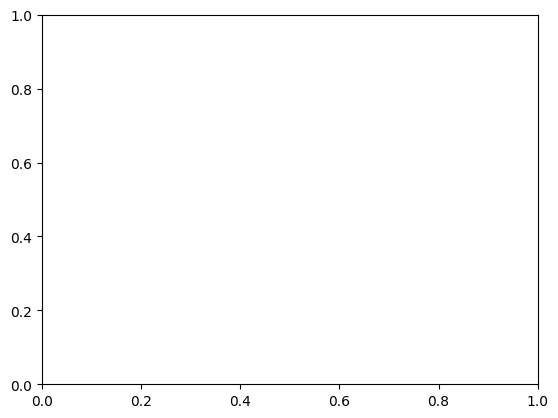

In [274]:
# Create the plot
plt.plot(lags, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(lags, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Lag')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create the plot
plt.plot(delays, train_mse_values, marker='o', linestyle='-', label='Train')
plt.plot(delays, valid_mse_values, marker='o', linestyle='-', label='Valid')
plt.xlabel('Frequency')
plt.ylabel('MSE')
plt.title('Train and Valid MSE vs Rank for Time Delay Embedding: Effect of Frequency')
plt.legend()
plt.grid(True)
plt.show()